In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error


In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df2 = df.copy()
df2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: ylabel='area'>

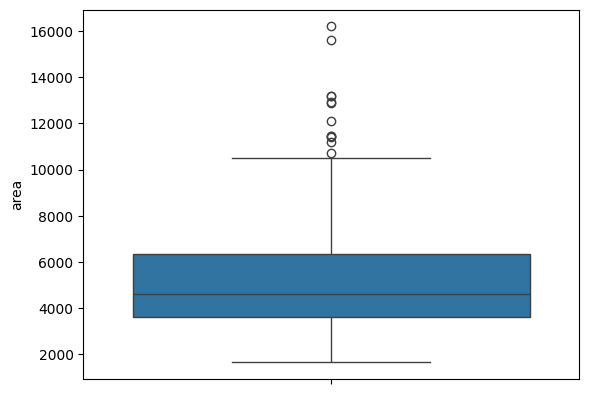

In [ ]:
sns.boxplot(df2['area'])

In [12]:
q1_area = df2['area'].quantile(0.25)
q3_area = df2['area'].quantile(0.75)

iqr_area = q3_area - q1_area

upper_area = q3_area + (1.5 * iqr_area)
lower_area = q1_area - (1.5 * iqr_area)

print(q1_area)
print(q3_area)
print(iqr_area)
print()
print(upper_area)
print(lower_area)

3600.0
6360.0
2760.0

10500.0
-540.0


In [14]:
len(df2.loc[(df2['area'] > upper_area) | (df2['area'] < lower_area)])

12

<Axes: ylabel='area'>

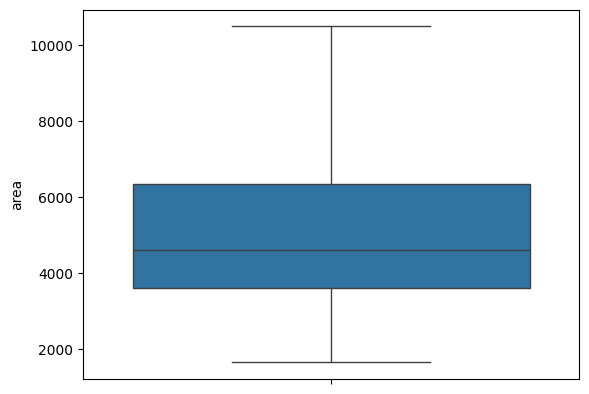

In [15]:
df2.loc[(df2['area'] > upper_area), 'area'] = upper_area

sns.boxplot(df2['area'])

In [17]:
print(len(df2.loc[(df2['area'] > upper_area) | (df2['area'] < lower_area)]))
print(len(df2))

0
545


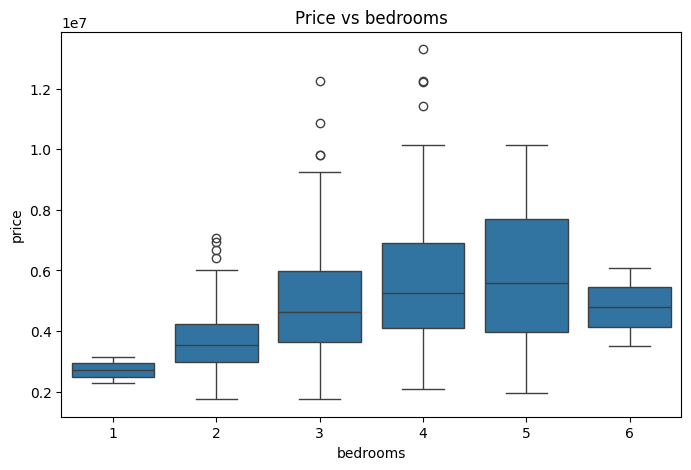

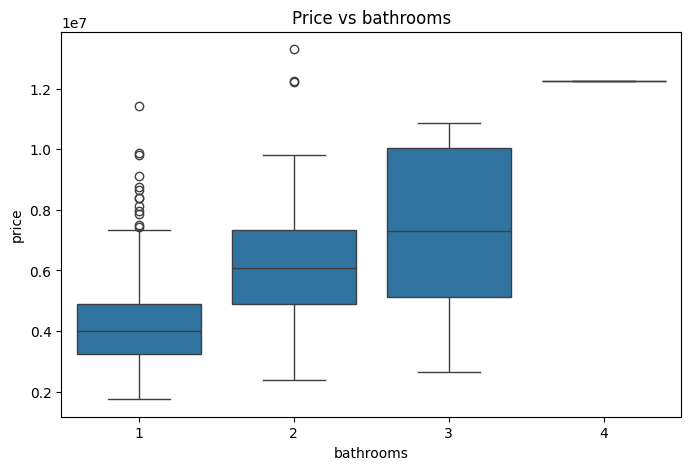

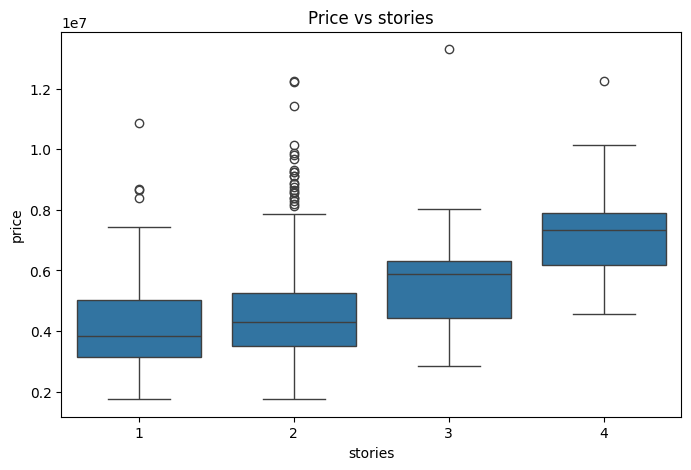

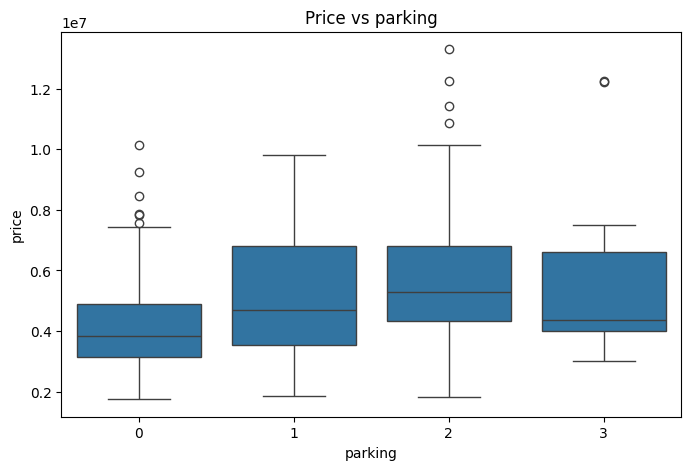

In [19]:

lst = ['bedrooms', 'bathrooms', 'stories', 'parking']

for col in lst:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df2[col], y=df2['price'])
    plt.title(f"Price vs {col}")
    plt.show()

In [21]:
df3 = df2.copy()
df3.T

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
price,13300000,12250000,12250000,12215000,11410000,10850000,10150000,10150000,9870000,9800000,...,2100000,1960000,1890000,1890000,1855000,1820000,1767150,1750000,1750000,1750000
area,7420,8960,9960,7500,7420,7500,8580,10500,8100,5750,...,3360,3420,1700,3649,2990,3000,2400,3620,2910,3850
bedrooms,4,4,3,4,4,3,4,5,4,3,...,2,5,3,2,2,2,3,2,3,3
bathrooms,2,4,2,2,1,3,3,3,1,2,...,1,1,1,1,1,1,1,1,1,1
stories,3,4,2,2,2,1,4,2,2,4,...,1,2,2,1,1,1,1,1,1,2
mainroad,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,no,yes,yes,no,yes,no,yes,no,yes
guestroom,no,no,no,no,yes,no,no,no,yes,yes,...,no,no,no,no,no,no,no,no,no,no
basement,no,no,yes,yes,yes,yes,no,no,yes,no,...,no,no,no,no,no,yes,no,no,no,no
hotwaterheating,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes,yes,yes,no,yes,yes,...,no,no,no,no,no,no,no,no,no,no


In [23]:
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for feature in cat_features:
    df3[feature] = df3[feature].map({'yes' : 1, 'no' : 0})
    
df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [26]:
df3 = df3.drop_duplicates()
df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [29]:
df3['furnishingstatus'] = df3['furnishingstatus'].map({'furnished' : 2, 'semi-furnished' : 1, 'unfurnished' : 0})

df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


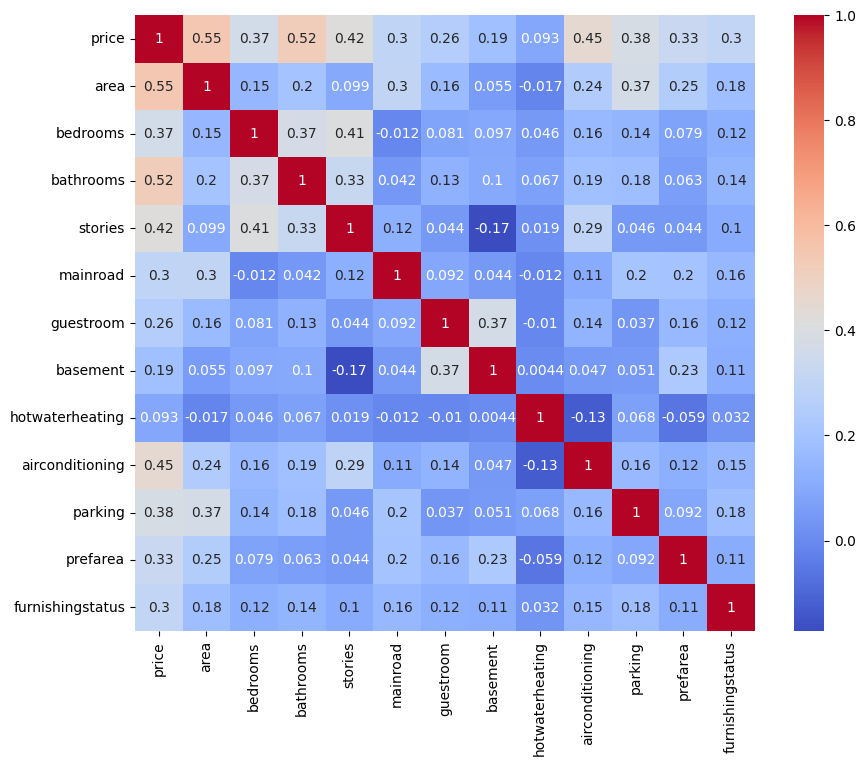

In [30]:
corr = df3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [31]:
df3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [34]:
# Split
X = df3.drop('price', axis=1)
y = df3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])



In [35]:
X_train_scaled

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
113,2.270169,0.083929,-0.569500,-0.917517,1,0,1,0,0,1.551207,1,2
508,-0.334133,-1.285792,-0.569500,-0.917517,1,0,0,0,0,-0.779889,0,0
220,1.511828,1.453650,-0.569500,2.570187,1,0,1,0,1,1.551207,0,1
177,0.489066,0.083929,-0.569500,-0.917517,1,0,1,0,0,-0.779889,1,1
81,-0.533696,0.083929,1.416448,0.245051,1,0,1,0,1,0.385659,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.473827,-1.285792,-0.569500,-0.917517,1,0,1,0,0,0.385659,0,1
98,0.763466,0.083929,1.416448,1.407619,1,0,0,0,1,-0.779889,1,0
33,0.444164,0.083929,3.402397,0.245051,1,1,1,0,0,0.385659,0,0
333,-1.032605,0.083929,-0.569500,0.245051,1,0,0,0,0,-0.779889,0,1


In [53]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_train_pred_lin = reg.predict(X_train_scaled)
y_test_pred_lin = reg.predict(X_test_scaled)

print("🔹 Linear Regression Results")
print("Train R²:", r2_score(y_train, y_train_pred_lin))
print("Test  R²:", r2_score(y_test, y_test_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_test_pred_lin))
print("MSE:", mean_squared_error(y_test, y_test_pred_lin))
print("RMSE:", root_mean_squared_error(y_test, y_test_pred_lin))

🔹 Linear Regression Results
Train R²: 0.6652319089757313
Test  R²: 0.6987485068034387
MAE: 797922.6899551894
MSE: 1208826504586.0913
RMSE: 1099466.4636022744


In [54]:
rid = Ridge(alpha=10)
rid.fit(X_train_scaled, y_train)
y_train_pred_ridge = rid.predict(X_train_scaled)
y_test_pred_ridge = rid.predict(X_test_scaled)

print("🔹 Ridge Regression Results")
print("Train R²:", r2_score(y_train, y_train_pred_ridge))
print("Test  R²:", r2_score(y_test, y_test_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_test_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_test_pred_ridge))
print("RMSE:", root_mean_squared_error(y_test, y_test_pred_ridge))

🔹 Ridge Regression Results
Train R²: 0.663251761286149
Test  R²: 0.6942323606039612
MAE: 801877.8324150663
MSE: 1226948364055.0237
RMSE: 1107677.012515392


In [55]:
lass = Lasso(alpha=0.1)
lass.fit(X_train_scaled, y_train)
y_train_pred_lasso = lass.predict(X_train_scaled)
y_test_pred_lasso = lass.predict(X_test_scaled)

print("🔹 Lasso Regression Results")
print("Train R²:", r2_score(y_train, y_train_pred_lasso))
print("Test  R²:", r2_score(y_test, y_test_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_test_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_test_pred_lasso))
print("RMSE:", mean_squared_error(y_test, y_test_pred_lasso))

🔹 Lasso Regression Results
Train R²: 0.6652319089755965
Test  R²: 0.6987484824410297
MAE: 797922.6844831641
MSE: 1208826602344.6963
RMSE: 1208826602344.6963


In [56]:
print("Target variable stats:")
print("Mean:", y.mean())
print("Median:", y.median())
print("Min:", y.min())
print("Max:", y.max())

Target variable stats:
Mean: 4766729.247706422
Median: 4340000.0
Min: 1750000
Max: 13300000
